<a href="https://colab.research.google.com/github/Hemanth-stack/kaggle_competitions/blob/main/taxiprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv')
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
from pandas.core.algorithms import value_counts
print(sum(data.amount)/len(data.amount))

11.36417139999998


In [ ]:
data.no_of_passenger.value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

In [ ]:
from math import radians, cos,sin,asin,sqrt

def distance(lon1,lon2,lat1,lat2):

  lon1 = radians(lon1)
  lon2 = radians(lon2)
  lat1 = radians(lat1)
  lat2 = radians(lat2)

  dlon = lon2 -lon1
  dlat = lat2 - lat1
  a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
  c = 2 * asin(sqrt(a))

  r = 6371
  return(round (c * r,2))

d = list()
for i in range(data.shape[0]):
  d.append(distance(data["latitude_of_pickup"][i],
                    data["latitude_of_dropoff"][i],
                    data["longitude_of_pickup"][i],
                    data["longitude_of_dropoff"][i]))


In [ ]:
data["distance in kms"] = d

In [ ]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance in kms
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.41
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,4.63
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.00
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.91
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.36


In [ ]:
data.drop(["longitude_of_dropoff","longitude_of_pickup","latitude_of_pickup","latitude_of_dropoff"],axis=1,inplace=True)

In [ ]:
data.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,1,0.41
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,1,4.63
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,2,1.00
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,1,0.91
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,1,1.36


In [ ]:
data["date_time_of_pickup"] = pd.to_datetime(data["date_time_of_pickup"])

In [ ]:
print("Date in data : ", data["date_time_of_pickup"].dt.day.sort_values().unique())
print("Month in data : ", data["date_time_of_pickup"].dt.month.unique()[0])
print("Year in data : ", data["date_time_of_pickup"].dt.year.unique()[0])

Date in data :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Month in data :  6
Year in data :  2009


In [ ]:
week_names = {0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}

data["Weekday_name"] = data["date_time_of_pickup"].dt.weekday.map(week_names)

In [ ]:
data.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms,Weekday_name,hour,month_day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.41,Sunday,17,15
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,4.63,Monday,16,5
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.00,Wednesday,0,18
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.91,Friday,4,21
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.36,Monday,7,9


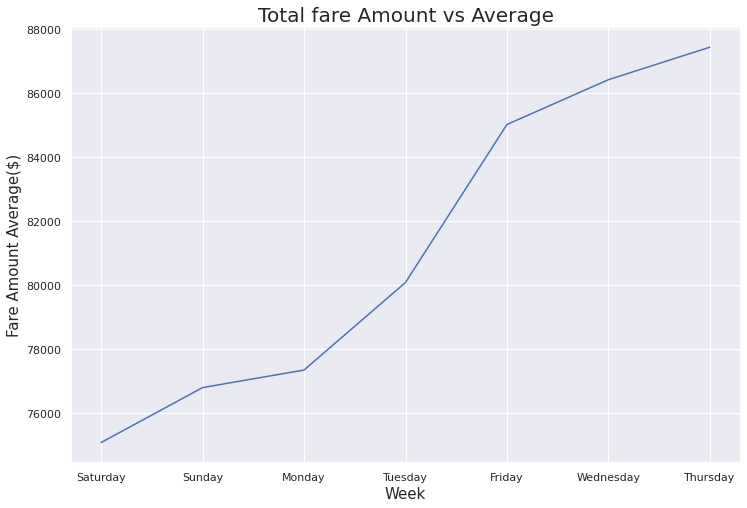

In [ ]:
plt.figure(figsize = (12,8))
data.groupby("Weekday_name")["amount"].sum().sort_values().plot()

plt.xlabel("Week", fontsize=15)
plt.ylabel("Fare Amount Average($)", fontsize=15)
plt.title("Total fare Amount vs Average", fontsize=20)
plt.show()

In [ ]:
week_names_encode = {"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7}

In [ ]:
data["Weekday_name"] = data["Weekday_name"].map(week_names_encode)
data.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms,Weekday_name,hour,month_day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1,17,15
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,4.63,3,16,5
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.00,6,0,18
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.91,5,4,21
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.36,3,7,9


In [ ]:
data["hour"] = data["date_time_of_pickup"].dt.hour

In [ ]:
data["hour"].unique()

array([17, 16,  0,  4,  7,  9, 20, 13,  1, 11, 19, 12, 14, 18, 15,  6, 21,
       23,  3,  8, 10,  2, 22,  5])

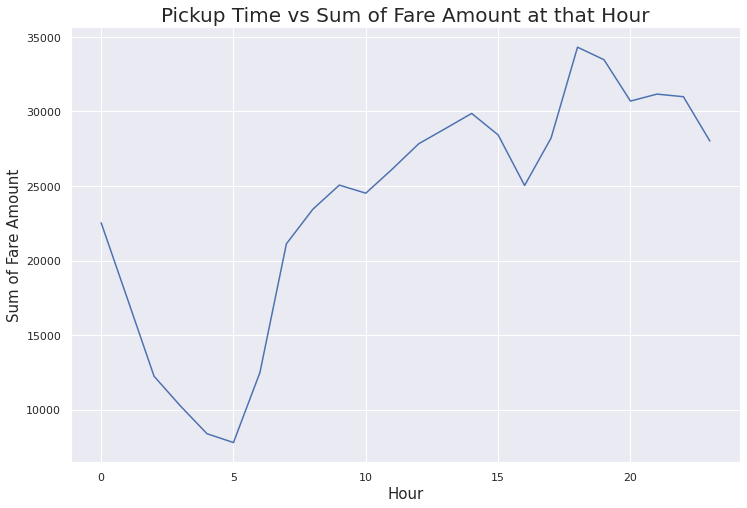

In [ ]:
plt.figure(figsize = (12,8))

data.groupby("hour")["amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that Hour", fontsize=20)
plt.xlabel("Hour", fontsize=15)
plt.ylabel("Sum of Fare Amount", fontsize=15)
plt.show()

In [ ]:
data["month_day"] = data["date_time_of_pickup"].dt.day

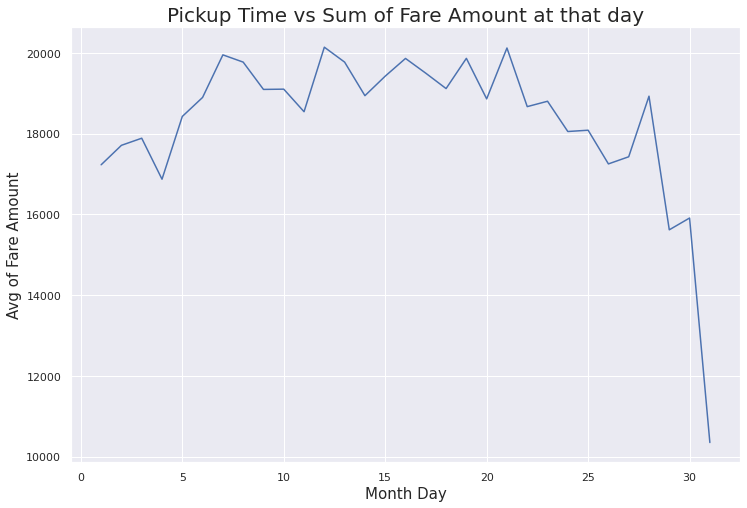

In [ ]:
plt.figure(figsize = (12, 8))

data.groupby("month_day")["amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that day", fontsize=20)
plt.xlabel("Month Day", fontsize=15)
plt.ylabel("Avg of Fare Amount", fontsize=15)
plt.show()

In [ ]:
data.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms,Weekday_name,hour,month_day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1,17,15
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,4.63,3,16,5
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.00,6,0,18
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.91,5,4,21
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.36,3,7,9


In [ ]:
data["no_of_passenger"].value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

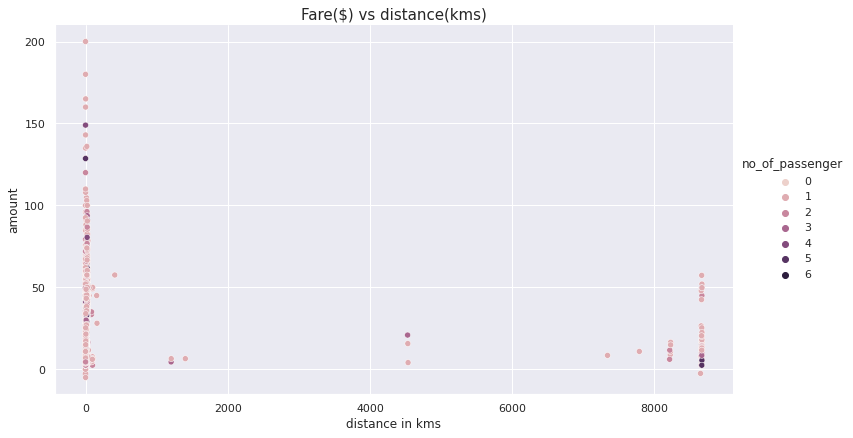

In [ ]:
sns.relplot(data = data, kind = "scatter",x = "distance in kms",y = "amount",
            hue = "no_of_passenger",height=6 ,aspect = 1.75,)
plt.title("Fare($) vs distance(kms)" , fontsize=15)
plt.show()

In [ ]:
data.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms,Weekday_name,hour,month_day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1,17,15
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,4.63,3,16,5
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.00,6,0,18
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.91,5,4,21
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.36,3,7,9


In [ ]:
data.groupby(["no_of_passenger"])[["no_of_passenger"]].sum()

,no_of_passenger
no_of_passenger,
0,0
1,34808
2,14772
3,6549
4,4064
5,17265
6,5934


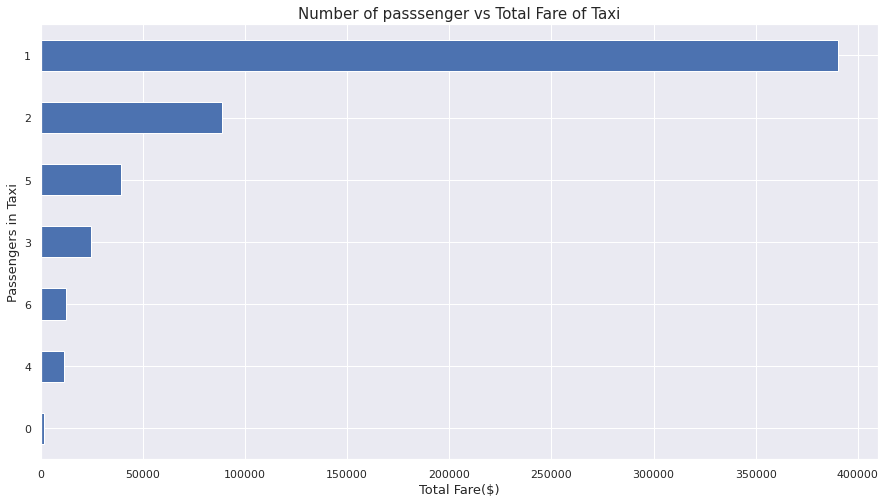

In [ ]:
plt.figure(figsize=(15,8))
data.groupby("no_of_passenger")["amount"].sum().sort_values().plot.barh()
plt.xlabel("Total Fare($)",fontsize =13)
plt.ylabel("Passengers in Taxi", fontsize =13)
plt.title("Number of passsenger vs Total Fare of Taxi", fontsize = 15)
plt.show()

In [ ]:
data.drop("date_time_of_pickup",axis=1,inplace=True)

In [ ]:
data.head()

,unique_id,amount,no_of_passenger,distance in kms,Weekday_name,hour,month_day
0,26:21.0,4.5,1,0.41,1,17,15
1,52:16.0,16.9,1,4.63,3,16,5
2,35:00.0,5.7,2,1.00,6,0,18
3,30:42.0,7.7,1,0.91,5,4,21
4,51:00.0,5.3,1,1.36,3,7,9


In [ ]:
data.to_csv("data_transformed.csv",index=False)

In [ ]:
df = pd.read_csv("data_transformed.csv")
df.head()

,unique_id,amount,no_of_passenger,distance in kms,Weekday_name,hour,month_day
0,26:21.0,4.5,1,0.41,1,17,15
1,52:16.0,16.9,1,4.63,3,16,5
2,35:00.0,5.7,2,1.00,6,0,18
3,30:42.0,7.7,1,0.91,5,4,21
4,51:00.0,5.3,1,1.36,3,7,9


In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,1]

In [ ]:
x.head()

,amount,no_of_passenger,distance in kms,Weekday_name,hour,month_day
0,4.5,1,0.41,1,17,15
1,16.9,1,4.63,3,16,5
2,5.7,2,1.00,6,0,18
3,7.7,1,0.91,5,4,21
4,5.3,1,1.36,3,7,9


In [ ]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: amount, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept= True, normalize =True)
linreg.fit(x_train , y_train)

LinearRegression(normalize=True)

In [ ]:
y_pred = linreg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators = 15)
rfreg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=15)

In [ ]:
predict = rfreg.predict(x_test)

In [ ]:
r2_score(y_test,predict)

0.9968270811518244

Therefore, the predicted taxi fare will range between 1.0 and 0.99682